In [48]:
import os
import re
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs, make_moons
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
data = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis = 1, inplace = True)

In [13]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
stop_words = set(stopwords.words('english'))

In [123]:
def preprocess_text(text):
    text=text.lower()
    text = re.sub(r'[^\w\s\d\.\\!\\?]','', text) 
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return tokens

In [30]:
#data["processed"] = data["v2"].apply(lambda x: preprocess_text(x))

#### Векторизация + модель

In [124]:
vec = TfidfVectorizer(tokenizer=lambda x:preprocess_text(x))

In [125]:
matrix = vec.fit_transform(data["v2"].values)

In [126]:
model = DBSCAN(eps=1.0, min_samples=7, n_jobs=-1)

In [127]:
model.fit(matrix)

DBSCAN(algorithm='auto', eps=1.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=-1, p=None)

In [128]:
clusters = model.labels_.tolist()

In [216]:
#clusters

In [129]:
pred = data["clusters"] = model.fit_predict(matrix)

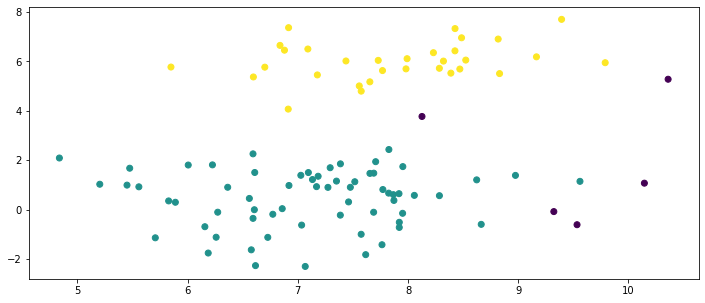

In [169]:
plt.figure(figsize=(12,5))
matrix, y = make_blobs()
y_pred = model.fit_predict(matrix)
plt.scatter(matrix[:,0], matrix[:,1],c=y_pred)

In [387]:
data

,v1,v2,clusters,tokens,sentiment_score
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazy, available, bugis, n...",1
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, u, oni]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",2
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, early, hor, u, c, already, say]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, think, goes, usf, lives, around, though]",0
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0,"[2nd, time, tried, 2, contact, u, u, å, 750, p...",2
5568,ham,Will Ì_ b going to esplanade fr home?,0,"[ì_, b, going, esplanade, fr, home]",0
5569,ham,"Pity, * was in mood for that. So...any other s...",-1,"[pity, mood, suggestions]",-1
5570,ham,The guy did some bitching but I acted like i'd...,0,"[guy, bitching, acted, like, interested, buyin...",2


In [170]:
data.clusters.value_counts()

 0    4025
-1    1535
 1      12
Name: clusters, dtype: int64

Так, видим, что у нас 1535 выбросов. Попробуем разобраться.

#### sentiment sore

In [230]:
f1 = open("positive-words.txt")
f2 = open("negative-words.txt")
pos =[]
neg =[]

for line in f1:
    line = line.strip()
    pos.append(line)
for line in f2:
    line = line.strip()
    neg.append(line)

In [231]:
def tokenize(text):
    text = re.sub(r'[^\w\d]',' ', text) 
    tokens = [word.lower() for word in nltk.word_tokenize(text)]
    tokens = [w for w in tokens if w not in stop_words]
    return tokens
        

In [232]:
data["tokens"] = data["v2"].apply(lambda x: tokenize(x))

In [233]:
data["len"] = data.tokens.apply(lambda x: len(x))

In [234]:
data["sentiment_score"] = data["tokens"].apply(lambda x: (sum(1 for w in x if w in pos)) + (sum(-1 for w in x if w in neg)))

In [235]:
data["Sentiment"] = data["sentiment_score"].apply(lambda x: "Positive" if x>0 else "Negative" if x<0 else "Neutral")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


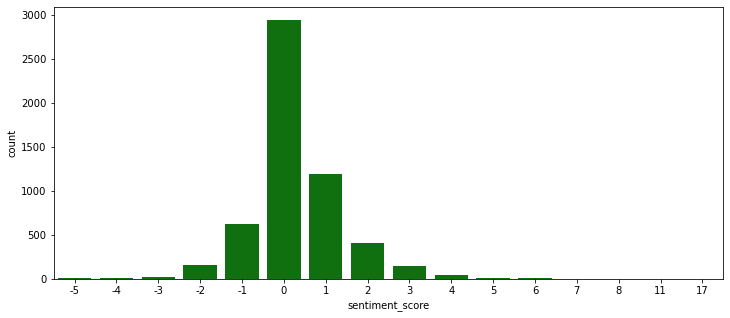

In [236]:
plt.figure(figsize=(12,5))
sns.countplot(data["sentiment_score"],color="g")

Посмотрим на выброы.


In [237]:
outlier = data[data.clusters==-1]

In [238]:
outlier

,v1,v2,clusters,tokens,sentiment_score,Sentimetnt,len,Sentiment
0,1,"Go until jurong point, crazy.. Available only ...",-1,"[go, jurong, point, crazy, available, bugis, n...",1,Positive,16,Positive
3,1,U dun say so early hor... U c already then say...,-1,"[u, dun, say, early, hor, u, c, already, say]",0,Neutral,9,Neutral
6,1,Even my brother is not like to speak with me. ...,-1,"[even, brother, like, speak, treat, like, aids...",2,Positive,8,Positive
8,0,WINNER!! As a valued network customer you have...,-1,"[winner, valued, network, customer, selected, ...",3,Positive,19,Positive
10,1,I'm gonna be home soon and i don't want to tal...,-1,"[gon, na, home, soon, want, talk, stuff, anymo...",1,Positive,13,Positive
...,...,...,...,...,...,...,...,...
5561,1,Get me out of this dump heap. My mom decided t...,-1,"[get, dump, heap, mom, decided, come, lowes, b...",-2,Negative,8,Negative
5564,1,Why don't you wait 'til at least wednesday to ...,-1,"[wait, til, least, wednesday, see, get]",0,Neutral,6,Neutral
5568,1,Will Ì_ b going to esplanade fr home?,-1,"[ì_, b, going, esplanade, fr, home]",0,Neutral,6,Neutral
5570,1,The guy did some bitching but I acted like i'd...,-1,"[guy, bitching, acted, like, interested, buyin...",2,Positive,13,Positive


In [179]:
outlier["v1"].value_counts()

1    1369
0     166
Name: v1, dtype: int64

Больше всего выбросов в обычных сообщениях(хотя изначально их больше)

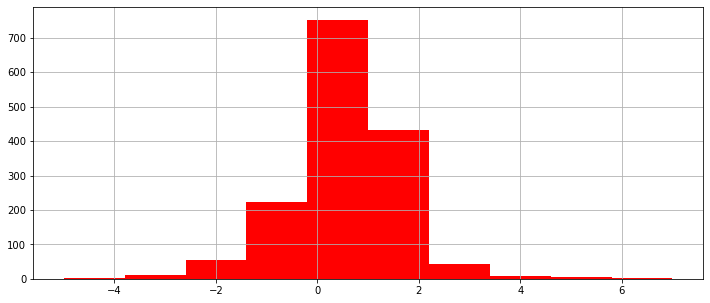

In [102]:
plt.figure(figsize=(12,5))
outlier.sentiment_score.hist(color="r")

Больше всего нейтральных слов, далее слова с положительной окраской.

In [240]:
data["v1"]= data["v1"].apply(lambda x: 1 if "ham" in x else 0)

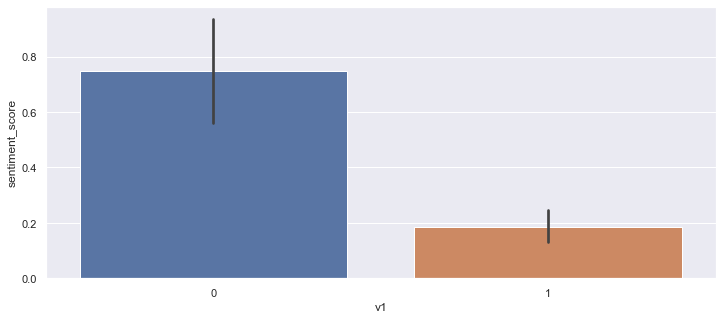

In [305]:
plt.figure(figsize=(12,5))
sns.barplot(x="v1", y="sentiment_score", data=outlier)

Найдем самые частотные слова для текстов-выброов.

In [242]:
import collections
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [243]:
words=[]
for w in outlier.tokens:
    words += w


In [244]:
from nltk.probability import FreqDist
fdist = FreqDist(words)

In [245]:
c1 = collections.Counter(words)

In [246]:
c1.most_common(25)

[('u', 398),
 ('2', 172),
 ('get', 111),
 ('lt', 98),
 ('gt', 97),
 ('call', 93),
 ('4', 91),
 ('go', 88),
 ('ur', 88),
 ('got', 81),
 ('like', 78),
 ('know', 78),
 ('come', 71),
 ('1', 66),
 ('å', 65),
 ('love', 63),
 ('time', 62),
 ('txt', 61),
 ('free', 60),
 ('want', 59),
 ('good', 59),
 ('need', 59),
 ('going', 59),
 ('send', 56),
 ('text', 56)]

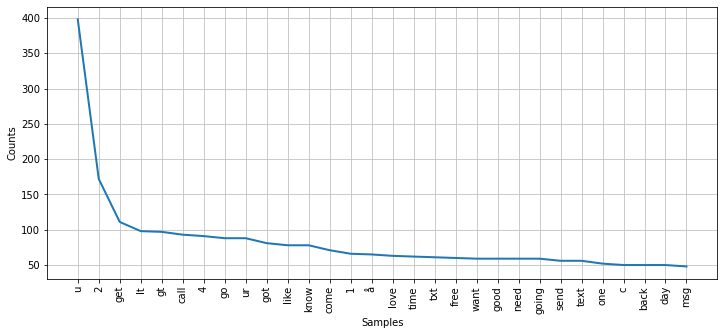

In [190]:
plt.figure(figsize=(12,5))
fdist.plot(30,cumulative=False)

In [215]:
word=""
for w in outlier["tokens"]:
    word += " ".join(w)

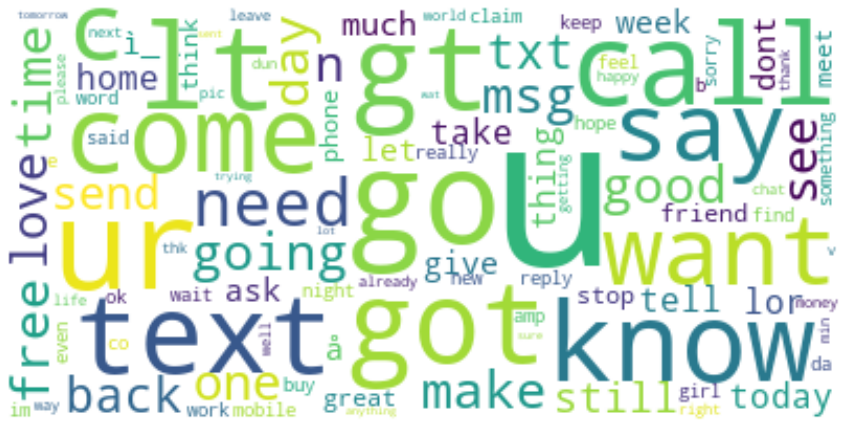

In [217]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(word)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [218]:
data["len"] = data.tokens.apply(lambda x: len(x))

In [221]:
data

,v1,v2,clusters,tokens,sentiment_score,Sentimetnt,len
0,1,"Go until jurong point, crazy.. Available only ...",-1,"[go, jurong, point, crazy, available, bugis, n...",1,Positive,16
1,1,Ok lar... Joking wif u oni...,0,"[ok, lar, joking, wif, u, oni]",0,Neutral,6
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",2,Positive,25
3,1,U dun say so early hor... U c already then say...,-1,"[u, dun, say, early, hor, u, c, already, say]",0,Neutral,9
4,1,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, think, goes, usf, lives, around, though]",0,Neutral,7
...,...,...,...,...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,0,"[2nd, time, tried, 2, contact, u, u, å, 750, p...",2,Positive,23
5568,1,Will Ì_ b going to esplanade fr home?,-1,"[ì_, b, going, esplanade, fr, home]",0,Neutral,6
5569,1,"Pity, * was in mood for that. So...any other s...",0,"[pity, mood, suggestions]",-1,Negative,3
5570,1,The guy did some bitching but I acted like i'd...,-1,"[guy, bitching, acted, like, interested, buyin...",2,Positive,13


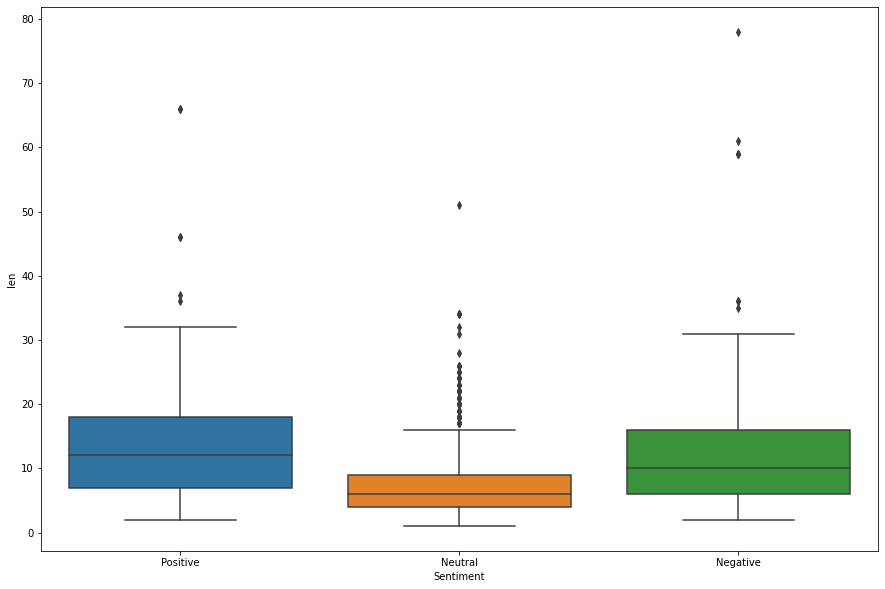

In [247]:
plt.figure(figsize = (15,10))
sns.boxplot(x="Sentiment", y="len", data=outlier)

Видим, что в выбросы попадают длинные предложения(медиана > 12) с положительной эмоциональной окраской.

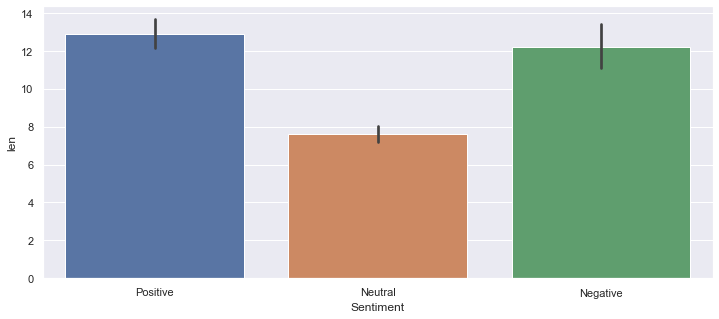

In [284]:
plt.figure(figsize=(12,5))
sns.barplot(x="Sentiment", y="len", data=outlier)

In [290]:
df = data.groupby(["clusters"])["len"].mean()

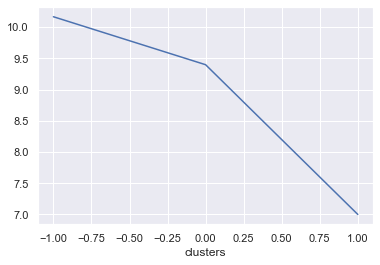

In [291]:
df.plot()

Можем заметить, что самые длинные предложения относятся к кластеру -1, т.е. к выбросам, а короткие - к 1-му кластеру.

#### Найдем самые частотные слова для каждого кластера.

In [292]:
cluster_1 = data[data["clusters"] == 1]
cluster_0 = data[data["clusters"] == 0]
cluster_min1 = data[data["clusters"] == -1]

### cluster_1

In [293]:
word=""
for w in cluster_1["tokens"]:
    word += " ".join(w)

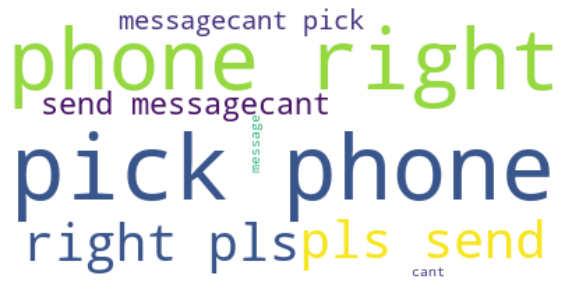

In [299]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(word)
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### cluster_0

In [300]:
word=""
for w in cluster_0["tokens"]:
    word += " ".join(w)

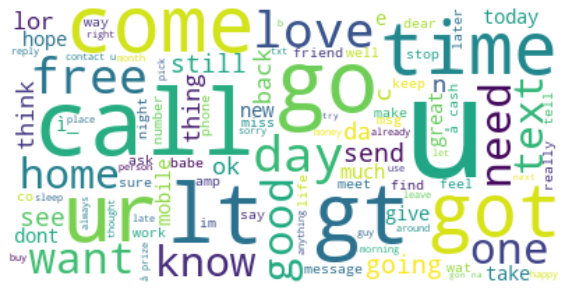

In [301]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(word)
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### cluster_- 1

In [302]:
word=""
for w in cluster_min1["tokens"]:
    word += " ".join(w)

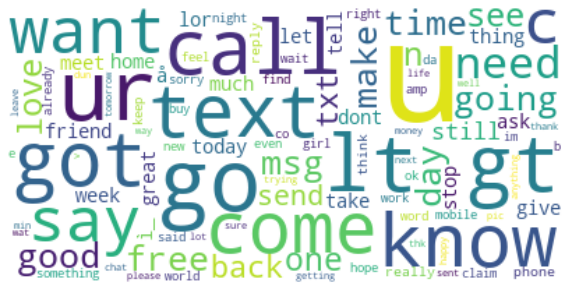

In [303]:
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(word)
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [306]:
outlier.groupby(["v1"])["sentiment_score"].mean()

v1
0    0.746988
1    0.186267
Name: sentiment_score, dtype: float64

Выводы:
1) Во-первых, чем больше eps, тем меньше кластеров.

2) Чем больше min_samples, тем больше кластеров --> больше выбросов.

3) В выбросах много предложений с нейтральной окраской.

4) Чаще всего, выбросы - обычные сообщения.

5) В среднем, в данных из выбросов у сообщений, относящихся к спаму, sentiment score выше.

6) В выбросы попадают наиболее длинные и эмоционально окрашенные предложения.